# Heart Disease ML Project

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/heart-disease-dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease-dataset/heart.csv


In [3]:
df = pd.read_csv("/kaggle/input/heart-disease-dataset/heart.csv")
df.head()  # Display first 5 rows


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
# Check for missing values
print(df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [5]:
df.fillna(df.median(), inplace=True)

In [6]:
df.fillna(df.mode().iloc[0], inplace=True)

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
# Dropping irrelevant columns
df_cleaned = df.drop(columns=['ca', 'thal', 'slope', 'oldpeak', 'restecg'])

# Save the cleaned dataset
df_cleaned.to_csv("heart_cleaned.csv", index=False)

# Display the first few rows to verify
print(df_cleaned.head())

   age  sex  cp  trestbps  chol  fbs  thalach  exang  target
0   52    1   0       125   212    0      168      0       0
1   53    1   0       140   203    1      155      1       0
2   70    1   0       145   174    0      125      1       0
3   61    1   0       148   203    0      161      0       0
4   62    0   0       138   294    1      106      0       0


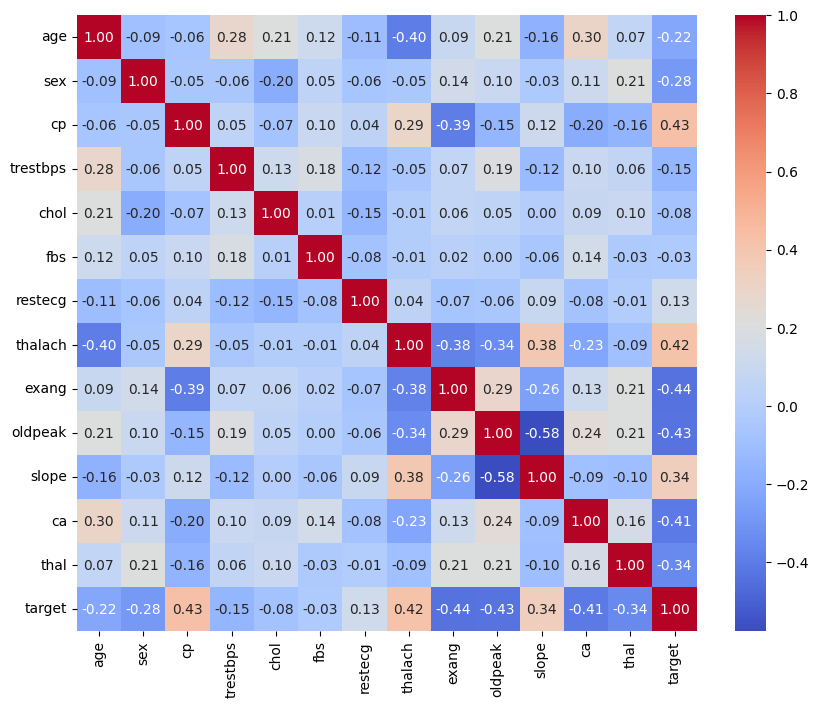

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.show()


In [10]:
import pandas as pd

# Load the dataset
df = pd.read_csv("/kaggle/input/heart-disease-dataset/heart.csv")  # Use the correct filename

# Drop unnecessary features
df = df.drop(columns=["trestbps", "chol", "fbs", "restecg", "sex"])

# Display first few rows after dropping
print(df.head())

   age  cp  thalach  exang  oldpeak  slope  ca  thal  target
0   52   0      168      0      1.0      2   2     3       0
1   53   0      155      1      3.1      0   0     3       0
2   70   0      125      1      2.6      0   0     3       0
3   61   0      161      0      0.0      2   1     3       0
4   62   0      106      0      1.9      1   3     2       0


In [11]:
import os
print(os.listdir("/kaggle/input/heart-disease-dataset/"))

['heart.csv']


In [12]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Define features and target
X = df.drop(columns=["target"])  # Independent variables
y = df["target"]  # Target variable

# Define preprocessing steps
num_features = ["age", "thalach", "oldpeak"]
cat_features = ["cp", "slope", "ca", "thal", "exang"]

preprocessor = ColumnTransformer([
    ("num", StandardScaler(), num_features),  # Normalize numerical features
    ("cat", OneHotEncoder(), cat_features)   # One-hot encode categorical features
])

# Split data into train & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply transformations
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Train model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8390243902439024
              precision    recall  f1-score   support

           0       0.91      0.75      0.82       102
           1       0.79      0.92      0.85       103

    accuracy                           0.84       205
   macro avg       0.85      0.84      0.84       205
weighted avg       0.85      0.84      0.84       205



In [14]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate model
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Accuracy: 0.9853658536585366
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],   # Number of trees
    'max_depth': [10, 20, None],      # Maximum depth
    'min_samples_split': [2, 5, 10],  # Min samples per split
    'min_samples_leaf': [1, 2, 4]     # Min samples per leaf
}

# Initialize model
rf = RandomForestClassifier(random_state=42)

# Perform Grid Search
grid_search = GridSearchCV(rf, param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Get best model
best_rf = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


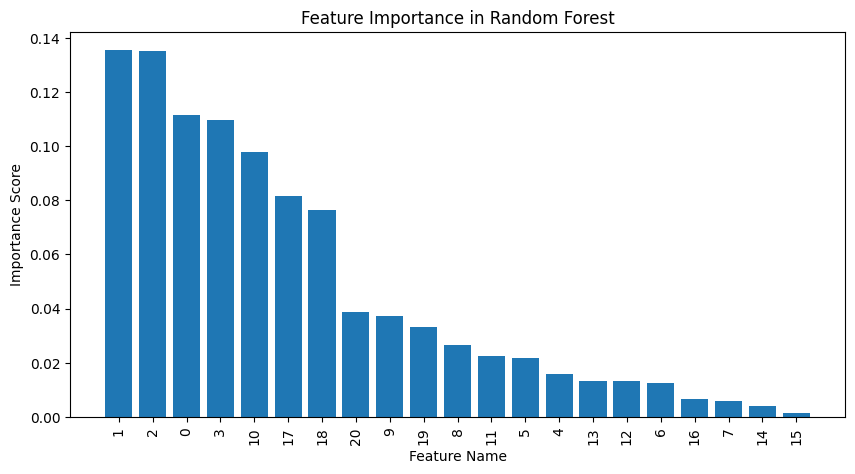

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Convert X_train to DataFrame if it's a NumPy array
if isinstance(X_train, np.ndarray):
    X_train = pd.DataFrame(X_train)

# Get feature importance
importances = best_rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot feature importance
plt.figure(figsize=(10, 5))
plt.title("Feature Importance in Random Forest")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), X_train.columns[indices], rotation=90)  # Now it works!
plt.xlabel("Feature Name")
plt.ylabel("Importance Score")
plt.show()


In [17]:
from sklearn.metrics import accuracy_score, classification_report

# Predict on test data
y_pred_train = best_rf.predict(X_train)
y_pred_test = best_rf.predict(X_test)

# Accuracy comparison
train_acc = accuracy_score(y_train, y_pred_train)
test_acc = accuracy_score(y_test, y_pred_test)

print(f"Training Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

# Detailed Classification Report
print("\nTest Set Performance:\n", classification_report(y_test, y_pred_test))


Training Accuracy: 1.0000
Test Accuracy: 0.9854

Test Set Performance:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import joblib

# Load your cleaned dataset
df = pd.read_csv("heart_cleaned.csv")

# Separate features and target variable
X = df.drop("target", axis=1)
y = df["target"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Save the trained model to a file
joblib.dump(rf_model, "random_forest_model.pkl")

print("Trained model saved as random_forest_model.pkl")



Trained model saved as random_forest_model.pkl
